In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('depression_dataset.csv')
data.head()

,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself — or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed? Or the opposite — being so fidgety or restless that you have been moving around a lot more than usual?,Thoughts that you would be better off dead or of hurting yourself in some way,Total Score,Interpretation
0,0,0,2,1,1,1,0,0,3,8,Mild depression symptoms
1,0,0,0,1,1,0,1,3,1,7,Mild depression symptoms
2,3,2,0,1,3,2,2,1,1,15,Moderately severe depression symptoms
3,2,0,0,3,0,2,2,2,0,11,Moderate depression symptoms
4,3,0,3,0,2,2,1,0,0,11,Moderate depression symptoms


In [3]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                     --------------  ----- 
 0   Little interest or pleasure in doing things                                                                                                                                1000 non-null   int64 
 1   Feeling down, depressed, or hopeless                                                                                                                                       1000 non-null   int64 
 2   Trouble falling or staying asleep, or sleeping too much                                      

In [4]:
data.head(1)

,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself — or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed? Or the opposite — being so fidgety or restless that you have been moving around a lot more than usual?,Thoughts that you would be better off dead or of hurting yourself in some way,Total Score,Interpretation
0,0,0,2,1,1,1,0,0,3,8,Mild depression symptoms


In [5]:
#Rename columns
data.columns = ['interest', 'depressed', 'sleep', 'tired', 'overeating', 'failure', 'concentration', 'speaking_slowly', 'hurt', 'total_score', 'Interpretation']
data.head(1)

,interest,depressed,sleep,tired,overeating,failure,concentration,speaking_slowly,hurt,total_score,Interpretation
0,0,0,2,1,1,1,0,0,3,8,Mild depression symptoms


In [6]:
#Formatting the Interpretation column
data['Interpretation'].unique()

array(['Mild depression symptoms',
       'Moderately severe depression symptoms',
       'Moderate depression symptoms', 'Minimal depression symptoms',
       'Severe depression symptoms'], dtype=object)

In [7]:
len(data['interest'].unique())

4

In [11]:
#Let's replace redundant  name with the standard  name
data['Interpretation'].replace({'Minimal depression symptoms': '05' , 'Mild depression symptoms':'10' , 'Moderate depression symptoms':'15' , 'Moderately severe depression symptoms':'20' , 'Severe depression symptoms':'25'} , inplace = True)
len(data['Interpretation'].unique())
data['Interpretation'].unique()

array(['10', '20', '15', '05', '25'], dtype=object)

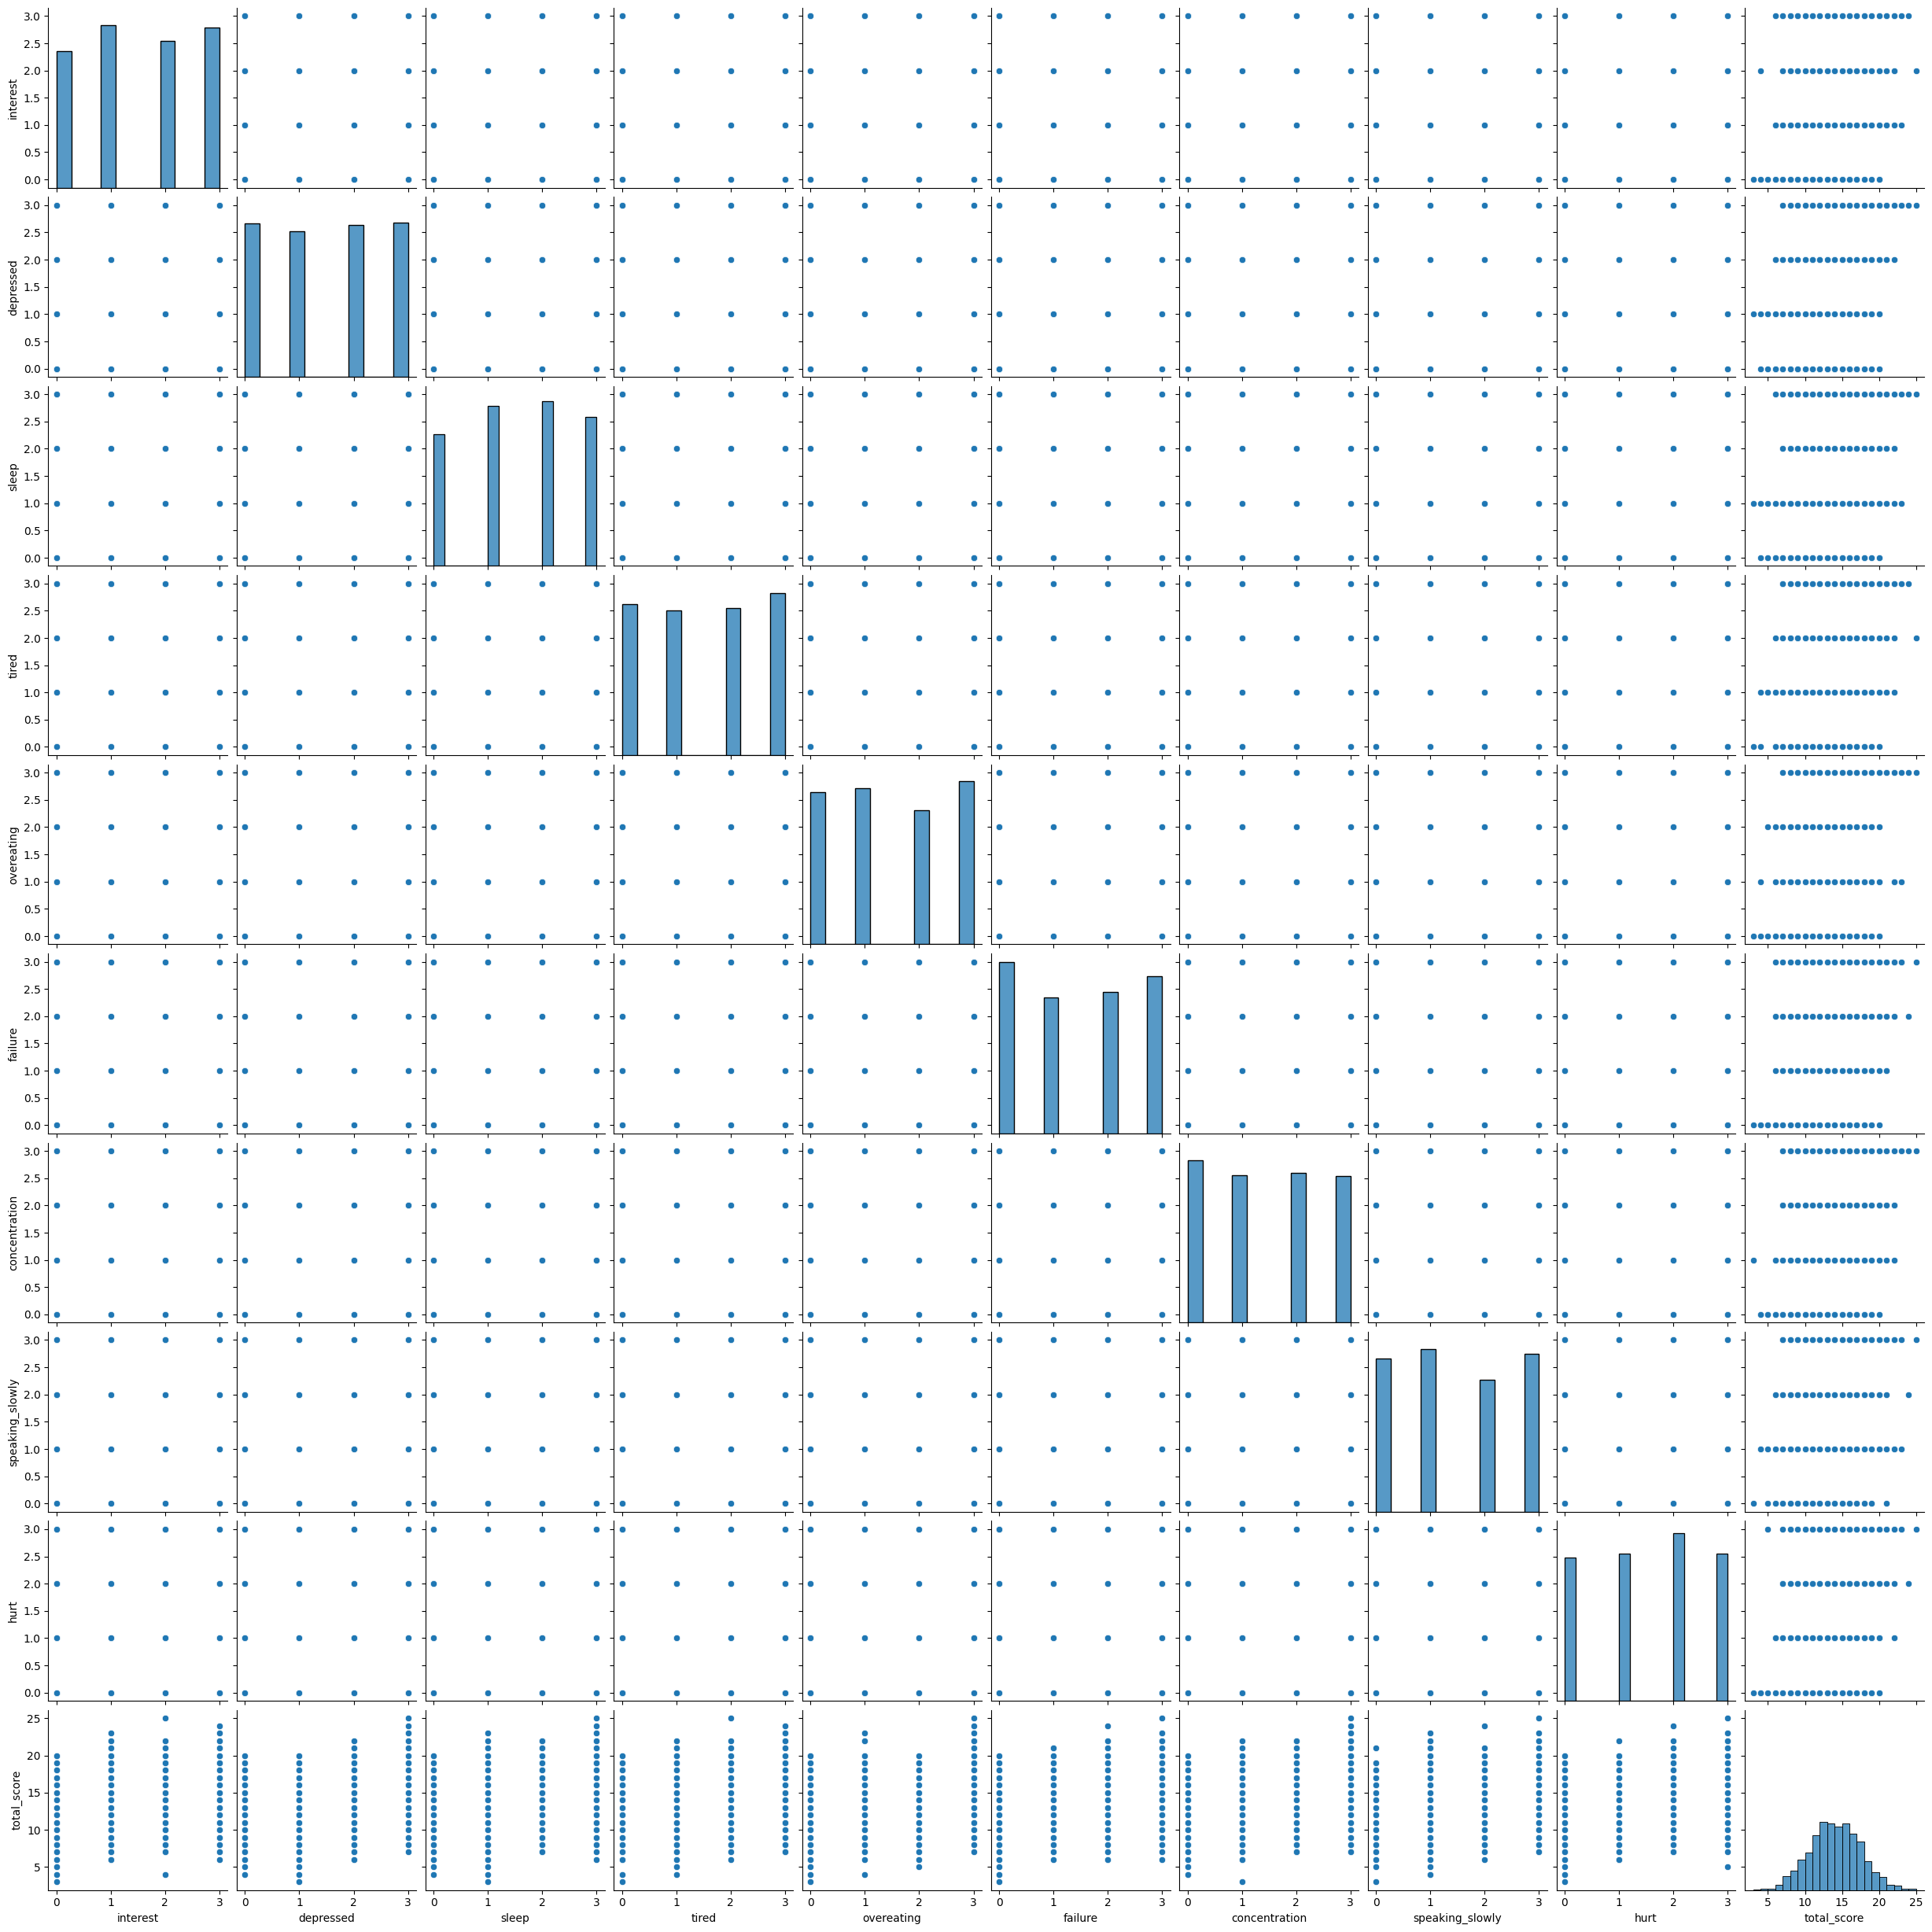

In [12]:
sns.pairplot(data)

In [ ]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data[''] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')